# 声纳与雷达系统 课程报告

吴天宇 12334125

## 利用 AT 工具箱完成 Ideal 波导和 Pekeris 波导声场计算

### 要求

1. 利用 Kraken 计算简正模态，并绘制前几阶模态函数。

2. 分别使用简正波 Kraken 和射线 Bellhop 计算声场，并分析两者差异（声速剖面可选取深海和浅海的典型声速剖面）。

### 概念

#### 波动方程

波动方程是描述声波在介质中传播的基本方程，它基于质量守恒和动量守恒的物理原理。在声纳与雷达技术中，波动方程考虑了密度扰动和速度场的关系，其质量守恒方程表达为：

$$
\frac{\partial \rho'}{\partial t} = -\rho_0 \nabla \cdot \mathbf{v}
$$

其中，$\rho'$ 是密度扰动，$\rho_0$ 是平均密度，$\mathbf{v}$ 是速度场。动量守恒，也称为欧拉方程，关联了速度场和压力扰动：

$$
\frac{\partial \mathbf{v}}{\partial t} = -\frac{1}{\rho_0} \nabla p'
$$

其中，$p'$ 表示压力扰动。状态方程进一步将压力扰动和密度扰动联系起来，对于线性介质，其形式为：

$$
p' = \rho' c^2
$$

其中，$c$ 是声速。结合这些方程，我们得到波动方程的标准形式：

$$
\nabla^2 p - \frac{1}{c^2} \frac{\partial^2 p}{\partial t^2} = 0
$$
$$
\nabla^2 \phi - \frac{1}{c^2} \frac{\partial^2 \phi}{\partial t^2} = 0
$$
$$
\nabla^2 \psi - \frac{1}{c^2} \frac{\partial^2 \psi}{\partial t^2} = 0
$$

其中，$p$ 代表声压，$\phi$ 和 $\psi$ 分别代表速度势和位移势，而 $\nabla^2$ 是拉普拉斯算子，表示空间的二阶导数。通过求解这些波动方程，可以预测声波在不同介质中的传播特性，这是声纳和雷达系统分析的基础。

#### 声传播模型

海洋声学环境通常非常复杂，具有距离和深度有关的特性，这种环境一般不适于对声传播作简单的分析预测。即使在距离无关的环境中，也存在许多路径，这些路径组合起来形成复杂的干涉图样。例如，收敛区是一个无法用单调几何扩展定律描述的更复杂结构的例子。声学模型在声传播预测中起着重要作用，这些模型的输入是海洋学量，最终转化为与声学有关的参数，如声速、密度和衰减。

海洋中的声传播用波动方程进行数学描述，波动方程的系数和边界条件由海洋环境导出。基本上有四种类型的模型(波动方程的计算机解)来描述海洋中的声传播，射线、频谱或快速场程序(FFP)、简正模态(NM)和抛物方程(PE)。射线理论是波动方程的一种渐近高频近似，而后三种模型或多或少是波动方程在各种温和约束下的直接解。高频极限不包括衍射现象。这些模型都能很好地处理海洋声环境的深度变化。同时考虑到环境水平变化(例如，倾斜的海底或空间可变的海洋学)的模型被称为距离有关模型。对于高频率(几千赫或以上)，射线理论最实用。其他三种类型在较低频率(1kHz以下)下更适用和可用。水声模型的层次结构如图1所示。这些模型的输出通常是传播损失，即在单位距离上相对于单位源强度，以 dB 表示。传输损耗Transmission loss是传播损失propagation loss的负值，因此是一个正值。不同模型之间存在差异，射线理论预测的阴影区比波动理论模型更尖锐。

![截屏2024-01-05 下午4.44.10.png](<attachment:截屏2024-01-05 下午4.44.10.png>)
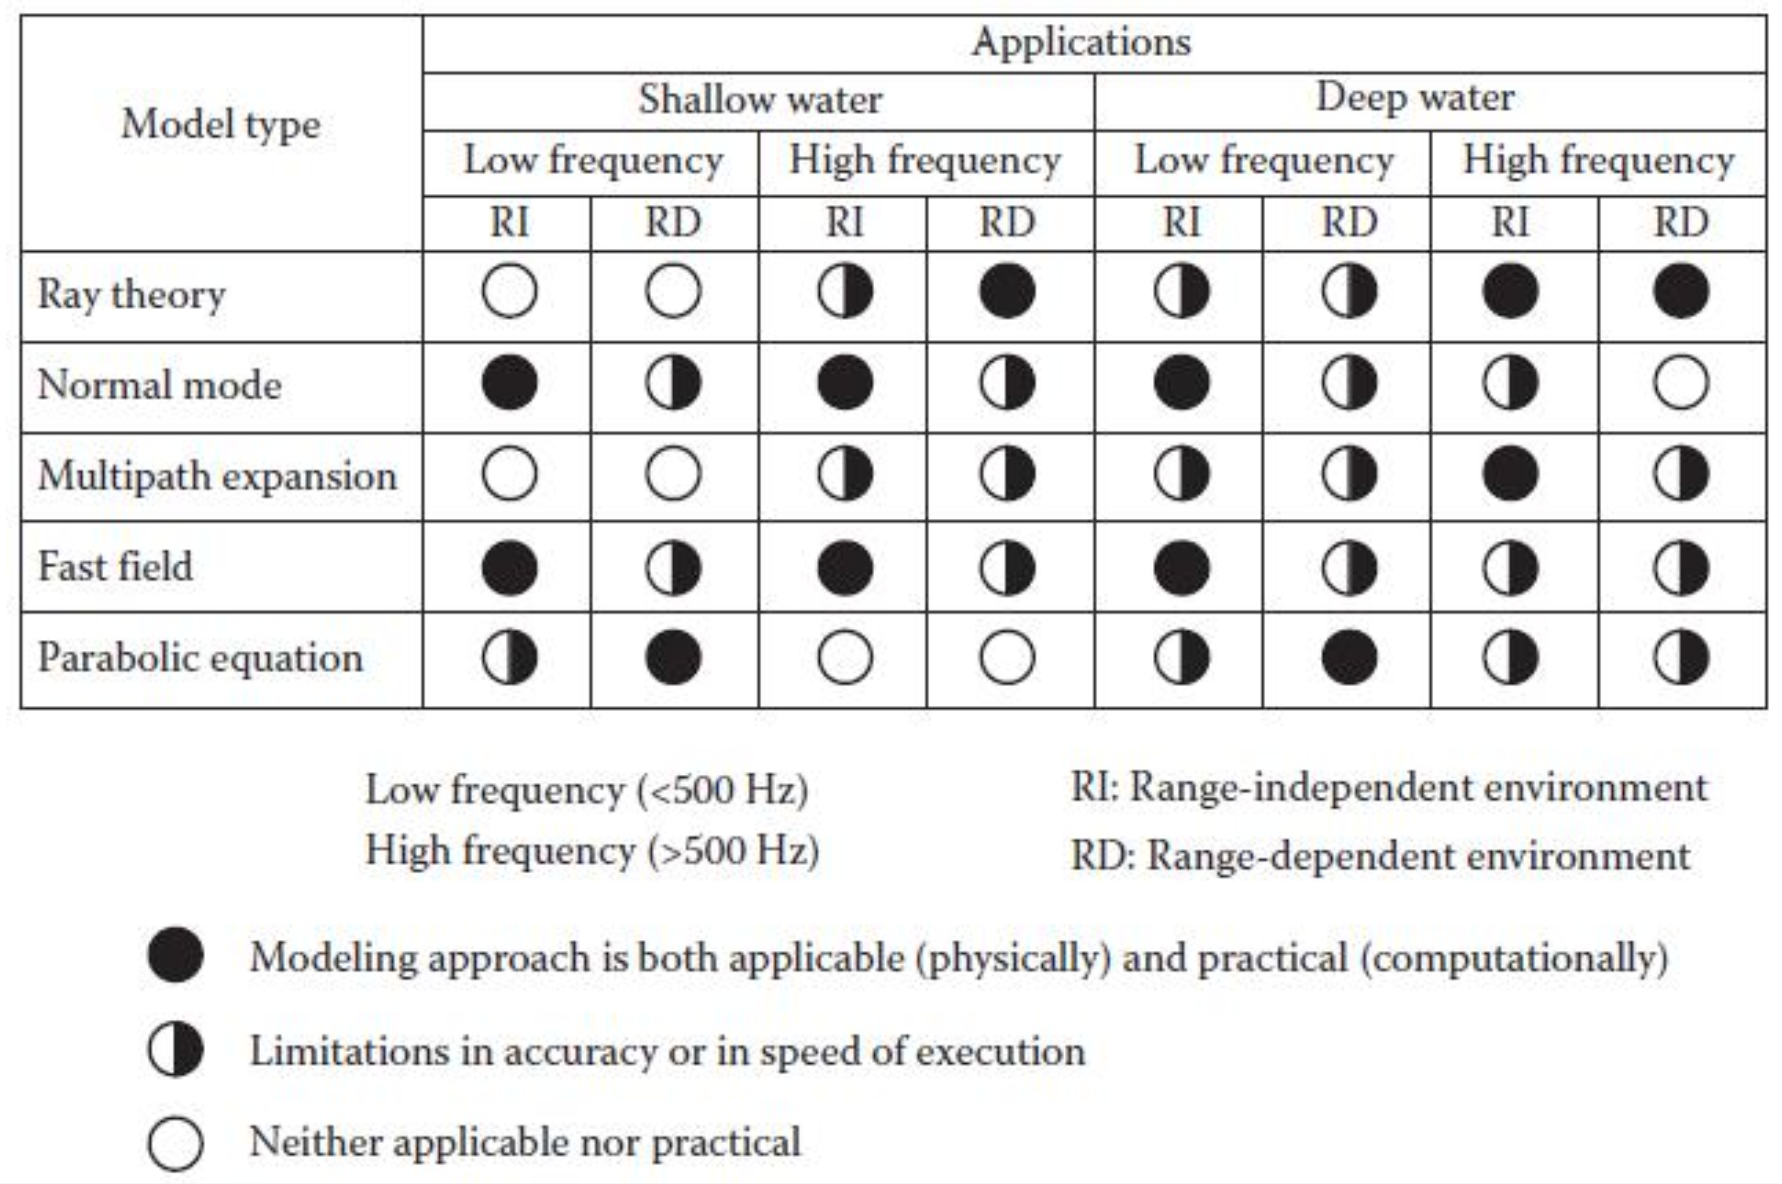

### 解答

首先定义浅海和深海的两种声速剖面

## 典型波形的模糊以及信道输出和信道响应

### 要求

1. 生成典型波形（如 CW、LFM、HFM、M 码、巴克码、Gold 码、FMCW 等，任选至少三种以上波形）。

2. 计算并绘制典型波形的模糊度图（含上调频和下调频，至少对比两种不同时间带宽积情况下模糊度图）。

3. 任选两种波形作为 Bellhop 声场软件的信号输入，计算并绘制输出波形，分析其与输入信号之间的差异。

4. 利用输入和输出信号计算水声信道脉冲响应和频率响应，分析其与信道真实响应之间的差异。

### 解答


## 基于恒虚警准则的声纳检测阈计算

### 要求

1. 声纳与雷达一般采用恒虚警率检测（CFAR），简述恒虚警率检测（CFAR）、最大似然检测（ML）与贝叶斯检测的关系（提供公式和框图）。

2. 简述贝叶斯公式中后验概率与似然度和先验概率之间关系在声纳与雷达检测中的作用（提供公式和框图）。

3. 计算当虚警概率 $P_f = 10^{-4}$ ，检测概率  $P_d = 90\%$ 时，时间带宽积 $BT = 1000$ 时，某型被动声纳能量检测器的检测阈 DT（提供公式和计算过程）。

4. 计算当虚警概率 $P_f = 10^{-4}$ ，检测概率 $P_d = 80\%$ 时，时间带宽积 $BT = 1000$ 时，某型主动声纳匹配滤波器的检测阈 DT（提供公式和计算过程）。

> Tip. 详参课件 5-统计检测之作业，接收机工作特性曲线 ROC 的推导和使用，检测阈的推导和使用详参伯迪克《水声系统分析》。

### 解答


## 基于最大似然估计 MLE 的声纳与雷达参数 CRB 推导及仿真计算

### 要求

1. 距离估计的 CRB 推导及仿真计算。

2. 速度估计的 CRB 推导及仿真计算。

3. 方位估计的 CRB 推导及仿真计算。

4. 简述最大后验估计和最大似然估计的联系与区别以及对 CRB 的影响。

### 解答


## 基于声纳方程的典型声纳系统的作用距离计算

### 要求

1. 主动声纳作用距离计算。

2. 被动声纳作用距离计算。

3. 通信声纳作用距离计算。

4. 上述三类声纳检测阈之间的联系和区别。

5. 优质因数与作用距离之间的关系。

### 解答


## 阵列波束形成

### 要求

1. 均匀直线阵的常规波束形成、最小无失真响应 MVDR、多信号分类 MUSIC、旋转不变子空间 ESPRIT 四种波束形成方法对比分析及其 MATLAB 仿真。

2. 归纳总结阵列协方差矩阵的意义及其在波束形成中的作用，请分析阵列协方差矩阵的本征分解、奇异值分解、LU 分解等常用矩阵分解方法之间的联系和区别。

### 解答


## 水下小目标高分辨、低虚警检测

### 要求

1. 将报告word和可运行的MATLAB软件源代码压缩后提交到学在浙大课程群中 ，自由组合研究小组，组间和组内可自由讨论、相互借鉴，但杜绝抄袭充分表达自己的技术观点，全面深入提出自己的解决方案，有必要的仿真计算和理论分析。报告正文A4纸页数>20页，逻辑严密，内容丰富，语句通顺，用词准确，公式图表规范，附参考文献目录及其原文。

2. 熟练使用课程知识点，结合专业文献调研，针对蛙人、水下无人航行器等水下小目标开展距离-速度-方位域高分辨、低虚警检测，解决连续主动声纳的指标论证、方案设计、发射波形、波束形成、匹配滤波、检测跟踪等关键技术，达成全方位、远距离、 高精度目标检测。

### 指标

1. 覆盖水平360度方位，测向均方根误差≤1度。

2. 最大斜距500米，测距均方根误差≤1m。

3. 覆盖±5节径向速度，测速均方根误差≤0.5m/s。

4. 虚警概率≤10^-4。

> Tip.指标论证：混响控制的主动声纳方程:SL-2TL-RL+TS>DT、声源级SL、传播损失TL、混响级RL、目标强度TS、检测阈DT。

> Tip.方案设设计：波形设计、波束形成、匹配滤波、目标检测（目标跟踪、目标分类）。


### 解答
